# Contents

- [Import libraries](#Import-libraries-and-initialize-base-model)
- [Initialize a neural signal transfer model](#Initialize-a-neural-signal-transfer-model)
- [Train model and generate images](#Train-model-and-generate-images)
- [View feature maps](#View-feature-maps-of-different-layers-of-the-model)

# Import libraries and initialize base model

In [1]:
# Import libraries
from tensorflow.python.keras.applications.vgg19 import VGG19
import matplotlib.pyplot as plt
%matplotlib inline

# Import module that I wrote
from neural_style_transfer import *

In [2]:
# Create base model based on VGG19
model = VGG19(
    include_top = False,
    weights = 'imagenet'
)

model.trainable = False
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

# Initialize a neural signal transfer model

In [3]:
# Initialize model
nst = NSTModel()

# Create content model
content_layer = 'block5_conv2'
content_image = 'golden_gate.jpg'
cm = ContentModel(base_model=model, layer=content_layer, imagepath=content_image)
nst.set_content_model(cm)

# Create style models
style_layers = ['block1_conv1', 'block3_conv1', 'block5_conv1']
style_image = 'starry_night.jpg'
sm = []
for layer in style_layers:
    style_model = StyleModel(base_model=model, layer=layer, imagepath=style_image)
    sm.append(style_model)
    nst.add_style_model(style_model)

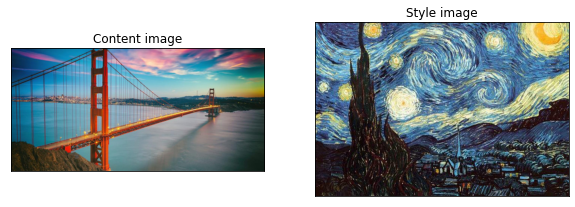

In [4]:
# View style and content images
plt.figure(figsize=(10,5))

# Show content image
plt.subplot(1,2,1)
cm.image.display()
plt.title('Content image')

# Show style image
plt.subplot(1,2,2)
sm[0].image.display()
plt.title('Style image')

plt.show()

# Train model and generate images

In [5]:
nst.set_iterations(30)
nst.training_loop(verbose=True)

Cost at 0: 511726624.0. Time elapsed: 31.932511806488037
Cost at 1: 324253984.0. Time elapsed: 61.428319215774536
Cost at 2: 201603024.0. Time elapsed: 85.33427500724792
Cost at 3: 136640656.0. Time elapsed: 110.50289845466614
Cost at 4: 112688888.0. Time elapsed: 132.7164363861084
Cost at 5: 88814832.0. Time elapsed: 156.06811141967773
Cost at 6: 69184248.0. Time elapsed: 177.86197566986084
Cost at 7: 58661476.0. Time elapsed: 197.20362997055054
Cost at 8: 52419592.0. Time elapsed: 216.87680673599243
Cost at 9: 46194272.0. Time elapsed: 238.16374325752258
Cost at 10: 39693172.0. Time elapsed: 262.00143218040466
Cost at 11: 33958868.0. Time elapsed: 285.24649310112
Cost at 12: 29252882.0. Time elapsed: 309.488810300827
Cost at 13: 25218916.0. Time elapsed: 330.0070798397064
Cost at 14: 21787942.0. Time elapsed: 350.0319471359253
Cost at 15: 19216030.0. Time elapsed: 370.1432993412018
Cost at 16: 17320320.0. Time elapsed: 397.8330543041229
Cost at 17: 15641323.0. Time elapsed: 419.65306

Display the content and style images along with the best generated image.

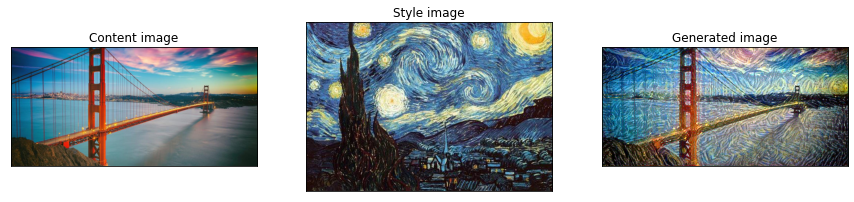

In [6]:
nst.show_results()

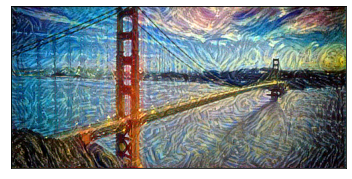

In [7]:
nst.best_image.display()

A couple other examples:

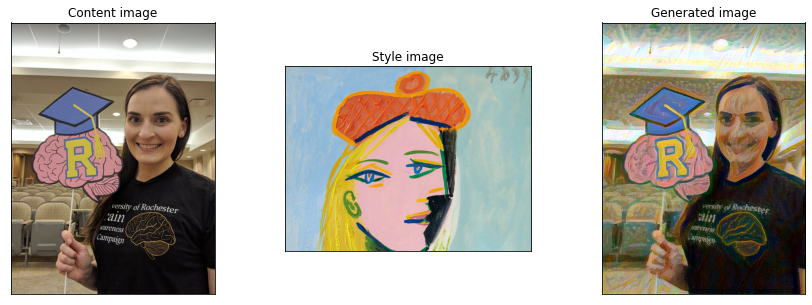

In [8]:
# Upload new content image
nst.content_model.set_image('NicoleBrainBee.jpg')

# Upload new style image for all layers in style model
for mdl in nst.style_models:
    mdl.set_image('picasso_portrait.jpg')

nst.reset()
nst.training_loop()

nst.show_results()

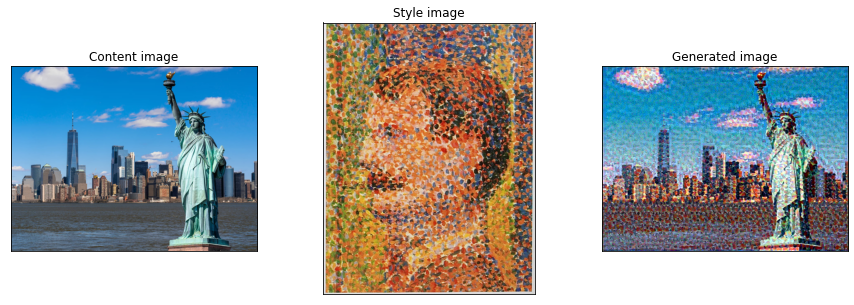

In [9]:
# Upload new content image
nst.content_model.set_image('statue_of_liberty.jpg')

# Upload new style image for all layers in style model
for mdl in nst.style_models:
    mdl.set_image('pointillism.jpg')

nst.reset()
nst.training_loop()

nst.show_results()

Display generated images from each iteration of training loop.

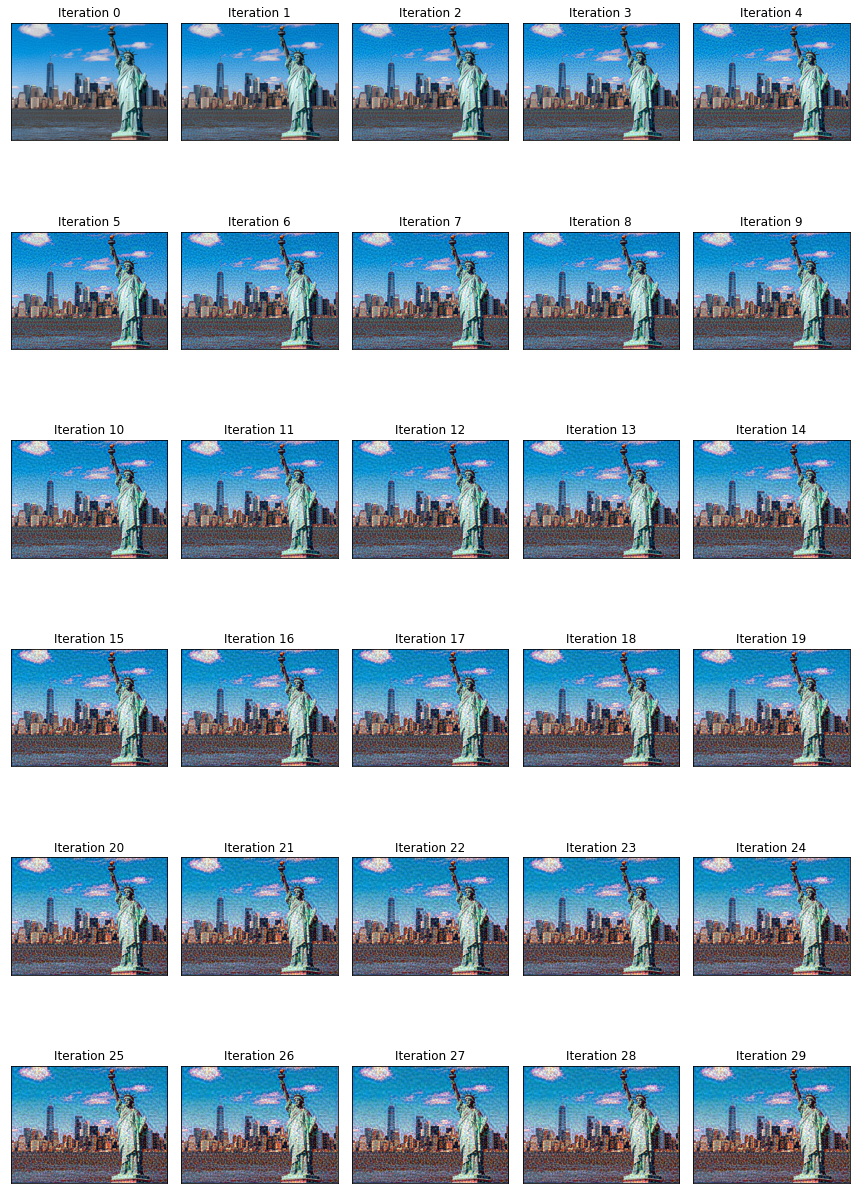

In [10]:
nst.show_generated_images()

Save the best image.

In [11]:
nst.best_image.save('statue_of_liberty_pointillism.jpg')

# View feature maps of different layers of the model

In [12]:
# Import functions
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.applications.vgg19 import preprocess_input
from tensorflow.python.keras.models import Model

# Load and preprocess image
img = load_img('NicoleBrainBee.jpg', target_size=(224, 224))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

In [13]:
def plot_features(layer):

    layer_model = Model(inputs=model.input,
                  outputs=model.get_layer(layer).output)
    feature_maps = layer_model.predict(img)

    plt.figure(figsize=(15,15))
    ct=1
    for row in range(8):
        for col in range(8):
            plt.subplot(8,8,ct)
            plt.imshow(feature_maps[0,:,:,ct-1], cmap='gray')
            plt.axis('off')
            ct+=1

The very first layer of the model consists of filters that respond primarily to luminance and color. Some filters appear to be edge detectors, responding to local contrasts.

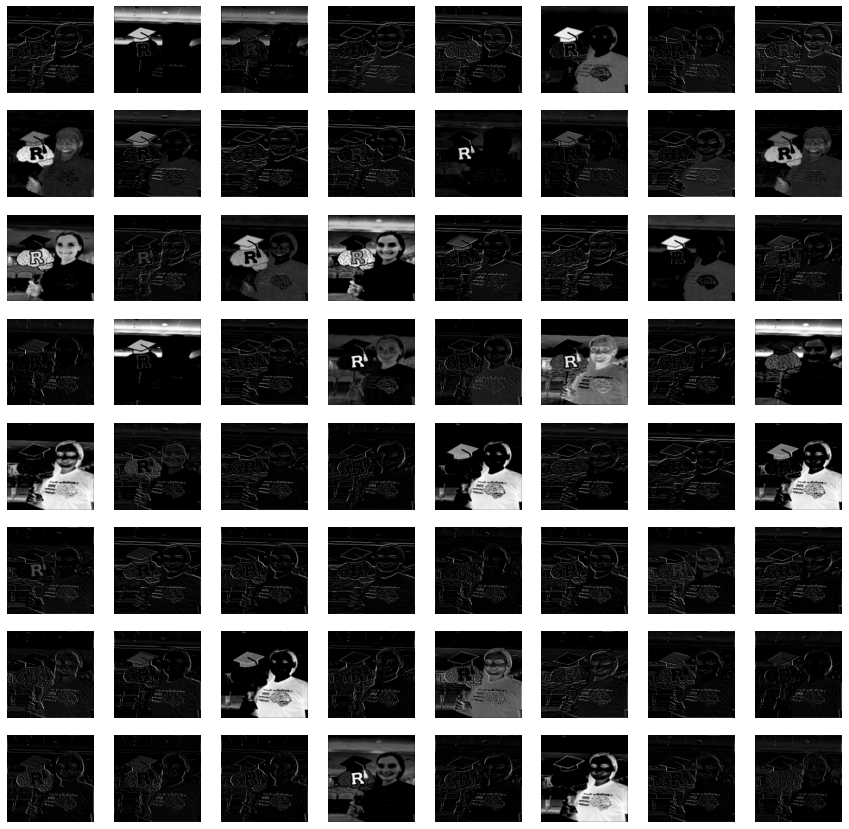

In [15]:
plot_features('block1_conv1')

In block 2, filters respond to more fine contrast/hue boundaries. A couple filters prefer horizontal lines.

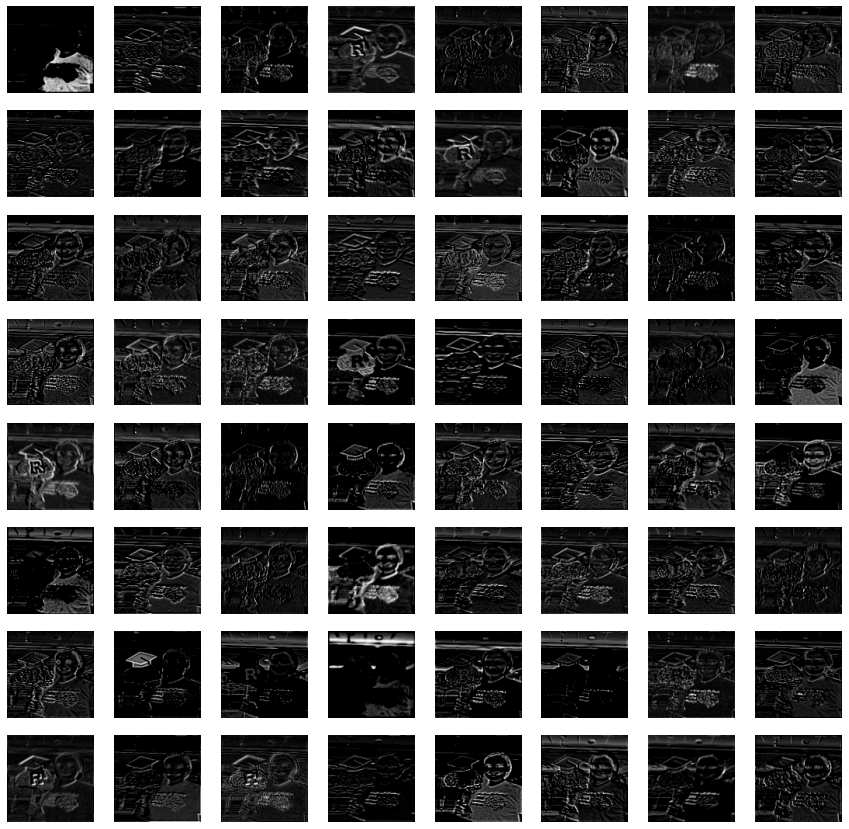

In [16]:
plot_features('block2_conv1')

Filters in the third block are selective for more specific features, such as oriented bars.

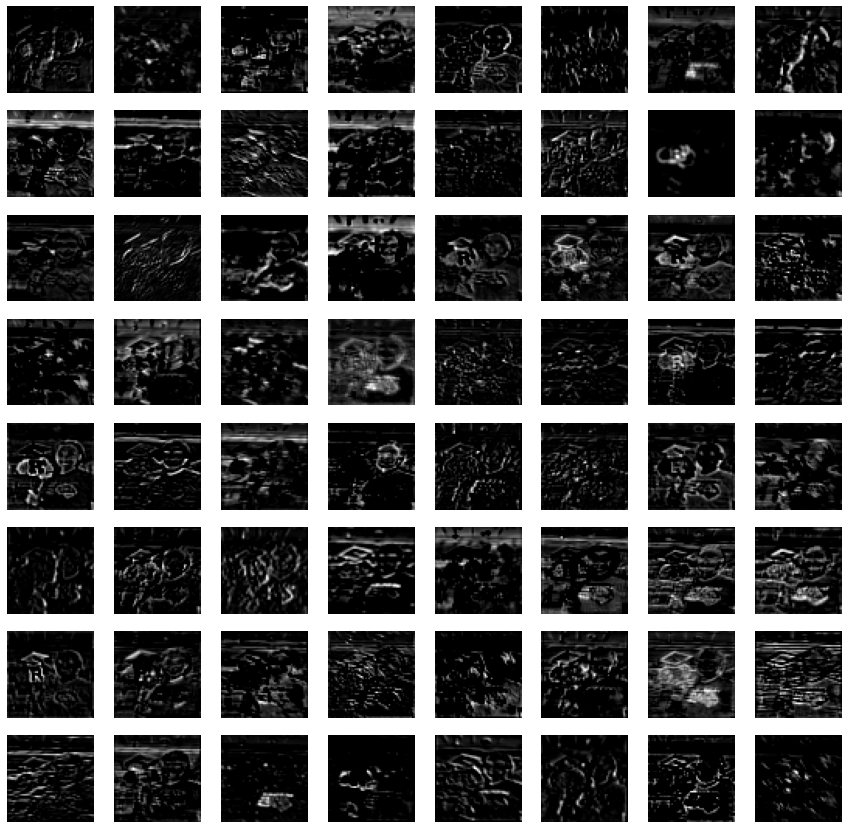

In [17]:
plot_features('block3_conv1')

By the time the image gets to the fourth and fifth blocks, it has already passed through several convolutions. The feature maps, then, do not resemble the original image much anymore. Some vague features (e.g., oriented lines) are visible.

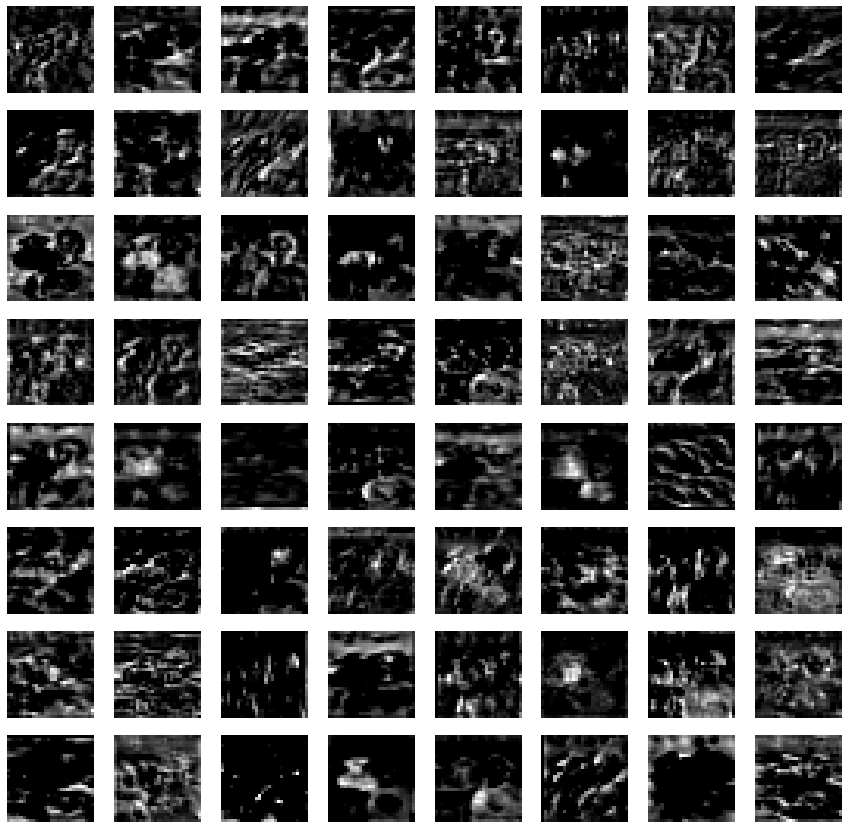

In [18]:
plot_features('block4_conv1')

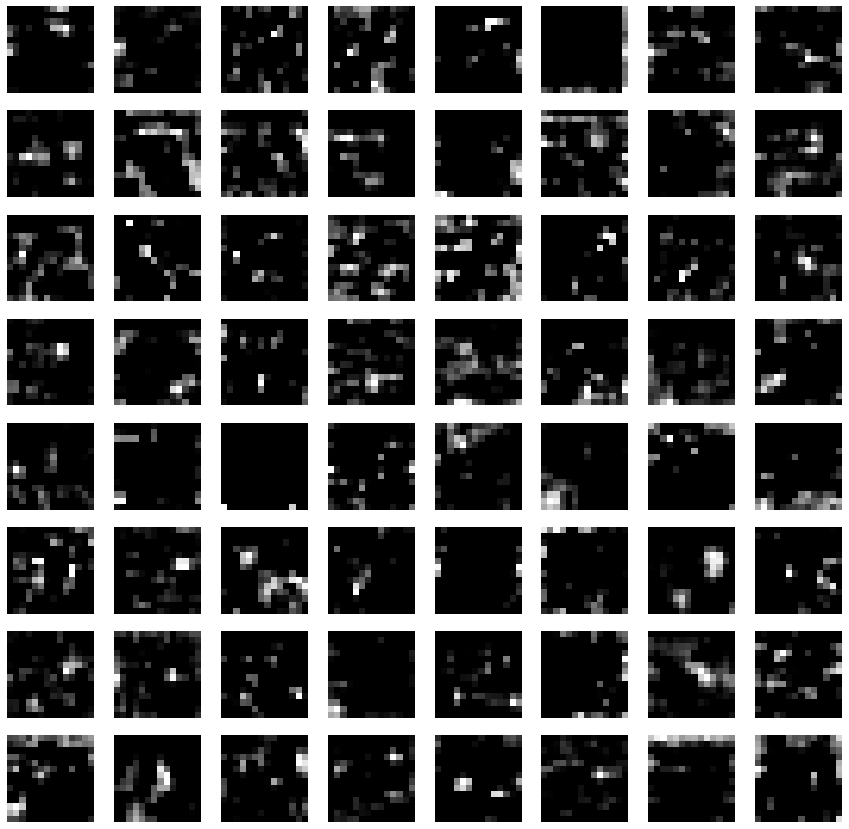

In [19]:
plot_features('block5_conv1')